In [41]:
%reset -f

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
df = pd.read_csv("training_set_VU_DM.csv", index_col=0)
df_test = pd.read_csv("test_set_VU_DM.csv", index_col=0)

# 1.Business Understanding

Blah blah

# 2. EDA

## Descriptive Statistics


In [44]:
# # Print the descriptive statistics for all numeric columns
# print(X.describe())
#
# # Print the frequency of each category for all categorical columns
# for col in X.select_dtypes(include=['object']):
#     print(X[col].value_counts())

## Distribution of Variables

In [45]:
# for col in X.select_dtypes(include=['int64', 'float64']):
#     plt.figure(figsize=(10, 5))
#     sns.histplot(X[col], kde=True)
#     plt.title(f"Distribution of {col}")
#     plt.show()

## Missing Values

In [46]:
# print(X.isnull().sum())

## Correlation Analysis

In [47]:
# corr_matrix = X.corr()
# plt.figure(figsize=(30, 15))
# sns.heatmap(corr_matrix, annot=True, fmt=".2f")
# plt.show()

## Visualize User Behavior

In [48]:
# # Example: Click-through rate by position
# click_rate_by_position = X.groupby('position')['click_bool'].mean()
# plt.figure(figsize=(10, 5))
# click_rate_by_position.plot(kind='bar')
# plt.title("Click-through Rate by Position")
# plt.show()

## Temporal Analysis

In [49]:
# # Assuming 'date_time' is a string, convert it to a datetime object
# X['date_time'] = pd.to_datetime(X['date_time'])
#
# # Example: Click-through rate by hour of the day
# X['hour'] = X['date_time'].dt.hour
# click_rate_by_hour = X.groupby('hour')['click_bool'].mean()
# plt.figure(figsize=(10, 5))
# click_rate_by_hour.plot(kind='line')
# plt.title("Click-through Rate by Hour of the Day")
# plt.show()

## Investigate the Target Variable

In [50]:
# # Print the frequency of each class in the target variable
# print(X['click_bool'].value_counts())
#
# # Plot the distribution of the target variable
# plt.figure(figsize=(10, 5))
# sns.countplot(x='click_bool', data=X)
# plt.title("Distribution of Clicks")
# plt.show()

# 2.Data preparation

### Break down date to more features - year - month - day - hour

In [51]:
df['date_time'] = pd.to_datetime(df['date_time'])
df['year'] = df['date_time'].dt.year
df['month'] = df['date_time'].dt.month
df['day'] = df['date_time'].dt.day
df['hour'] = df['date_time'].dt.hour
df['day_string'] = df['date_time'].dt.day_name()


df_test['date_time'] = pd.to_datetime(df_test['date_time'])
df_test['year'] = df_test['date_time'].dt.year
df_test['month'] = df_test['date_time'].dt.month
df_test['day'] = df_test['date_time'].dt.day
df_test['hour'] = df_test['date_time'].dt.hour
df_test['day_string'] = df_test['date_time'].dt.day_name()
# X.drop(['date_time'], axis = 1, inplace=True)

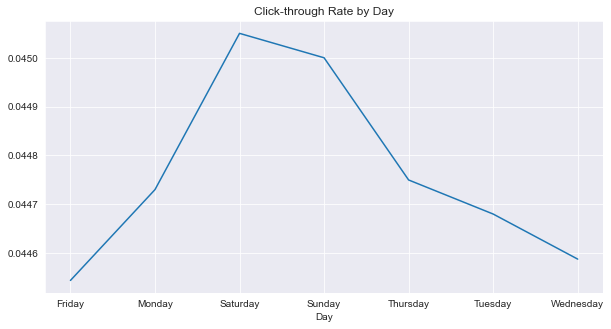

In [52]:
click_rate_by_hour = df.groupby('day_string')['click_bool'].mean()
plt.figure(figsize=(10, 5))
click_rate_by_hour.plot(kind='line')
plt.title("Click-through Rate by Day")
plt.xlabel("Day")
plt.show()

### Convert competitor info to aggregated_info

In [53]:
rate_cols = ['comp1_rate', 'comp2_rate', 'comp3_rate', 'comp4_rate', 'comp5_rate', 'comp6_rate', 'comp7_rate', 'comp8_rate']

inv_cols = ['comp1_inv', 'comp2_inv', 'comp3_inv', 'comp4_inv', 'comp5_inv', 'comp6_inv', 'comp7_inv', 'comp8_inv']

percent_diff_cols = ['comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff']

df['avg_rate'] = df[rate_cols].mean(axis=1)
df['avg_inv'] = df[inv_cols].mean(axis=1)
df['avg_rate_percent_diff'] = df[percent_diff_cols].mean(axis=1)

df_test['avg_rate'] = df_test[rate_cols].mean(axis=1)
df_test['avg_inv'] = df_test[inv_cols].mean(axis=1)
df_test['avg_rate_percent_diff'] = df_test[percent_diff_cols].mean(axis=1)

In [54]:
df.drop(columns=rate_cols + inv_cols + percent_diff_cols, inplace=True)
df_test.drop(columns=rate_cols + inv_cols + percent_diff_cols, inplace=True)

### Imputation

In [55]:
print(df.isnull().sum())

date_time                            0
site_id                              0
visitor_location_country_id          0
visitor_hist_starrating        4706481
visitor_hist_adr_usd           4705359
prop_country_id                      0
prop_id                              0
prop_starrating                      0
prop_review_score                 7364
prop_brand_bool                      0
prop_location_score1                 0
prop_location_score2           1090348
prop_log_historical_price            0
position                             0
price_usd                            0
promotion_flag                       0
srch_destination_id                  0
srch_length_of_stay                  0
srch_booking_window                  0
srch_adults_count                    0
srch_children_count                  0
srch_room_count                      0
srch_saturday_night_bool             0
srch_query_affinity_score      4640941
orig_destination_distance      1607782
random_bool              

In [56]:
drop_list = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score', 'gross_bookings_usd']
zero_list = ['avg_rate', 'avg_inv', 'avg_rate_percent_diff']
mean_list = ['prop_location_score2', 'prop_review_score', 'orig_destination_distance']

In [57]:
df.drop(drop_list, axis=1, inplace=True)

for col in zero_list:
    df[col] = df[col].fillna(0)
    df_test[col] = df_test[col].fillna(0)

for col in mean_list:
    df[col] = df[col].fillna(df[col].mean())
    df_test[col] = df_test[col].fillna(df_test[col].mean())

In [58]:
print(df.isnull().sum())

date_time                      0
site_id                        0
visitor_location_country_id    0
prop_country_id                0
prop_id                        0
prop_starrating                0
prop_review_score              0
prop_brand_bool                0
prop_location_score1           0
prop_location_score2           0
prop_log_historical_price      0
position                       0
price_usd                      0
promotion_flag                 0
srch_destination_id            0
srch_length_of_stay            0
srch_booking_window            0
srch_adults_count              0
srch_children_count            0
srch_room_count                0
srch_saturday_night_bool       0
orig_destination_distance      0
random_bool                    0
click_bool                     0
booking_bool                   0
year                           0
month                          0
day                            0
hour                           0
day_string                     0
avg_rate  

# Modeling and evaluation

## Model 1 - predict what hotels properties listed as a result of a hotel search a user is most likely to click on

In [59]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV

df.reset_index(inplace=True)
df.rename(columns={'index': 'srch_id'}, inplace=True)

# Create relevance grades
df['relevance'] = df['booking_bool'] * 5 + df['click_bool'] * (df['booking_bool'] == 0)

# Prepare data for the SVD model
reader = Reader(rating_scale=(0, 5))
data = Dataset.load_from_df(df[['srch_id', 'prop_id', 'relevance']], reader)

# Split data into training and test set
trainset, testset = train_test_split(data, test_size=.25)

# Define the parameter grid
param_grid = {
    'n_epochs': [5, 10, 20],  # number of iterations
    'lr_all': [0.002, 0.005],  # learning rate
    'reg_all': [0.4, 0.6]  # regularization term
}

# Use GridSearchCV to find the best parameters
gs = GridSearchCV(SVD, param_grid, measures=['mae'], cv=3)

# Fit the GridSearchCV object to the data
gs.fit(data)

# Get the best parameters
best_params = gs.best_params['mae']

# Print the best parameters
print(f"Best parameters: {best_params}")

# Now you can create a new SVD model with the best parameters
model = SVD(**best_params)
model.fit(trainset)

# Test the model with the best parameters
predictions = model.test(testset)

Best parameters: {'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.6}


In [60]:
from sklearn.metrics import ndcg_score
import numpy as np

# Convert predictions to arrays for scikit-learn
y_true = np.array([pred.r_ui for pred in predictions])
y_score = np.array([pred.est for pred in predictions])

# Reshape arrays to 2D for scikit-learn
y_true = np.reshape(y_true, (1, -1))
y_score = np.reshape(y_score, (1, -1))

# Calculate NDCG
ndcg = ndcg_score(y_true, y_score)
print(f"NDCG: {ndcg}")

NDCG: 0.7475002780740226


In [61]:
# Prepare test data for the SVD model
df_test.reset_index(inplace=True)
df_test.rename(columns={'index': 'srch_id'}, inplace=True)

# Use the trained model to predict relevance score for each search id and property id in the test set
df_test['predicted_relevance'] = df_test.apply(lambda row: model.predict(row['srch_id'], row['prop_id']).est, axis=1)

# Now df_test contains a new column 'predicted_relevance' with the predicted relevance scores
print(df_test)

         srch_id           date_time  site_id  visitor_location_country_id  \
0              1 2013-02-02 15:27:40       24                          216   
1              1 2013-02-02 15:27:40       24                          216   
2              1 2013-02-02 15:27:40       24                          216   
3              1 2013-02-02 15:27:40       24                          216   
4              1 2013-02-02 15:27:40       24                          216   
...          ...                 ...      ...                          ...   
4959178   332787 2013-05-21 11:06:37       24                          216   
4959179   332787 2013-05-21 11:06:37       24                          216   
4959180   332787 2013-05-21 11:06:37       24                          216   
4959181   332787 2013-05-21 11:06:37       24                          216   
4959182   332787 2013-05-21 11:06:37       24                          216   

         visitor_hist_starrating  visitor_hist_adr_usd  prop_co

In [63]:
# Sort dataframe by 'predicted_relevance' in descending order
df_test_sorted = df_test.sort_values(by='predicted_relevance', ascending=False)

# Select 'srch_id' and 'prop_id' columns and export to a .txt file
df_test_sorted[['srch_id', 'prop_id']].to_csv('prediction.csv', index=False, header=['srch_id', 'prop_id'], sep=',')